In [14]:
import pandas as pd


In [15]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [16]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [18]:
missing_values = data.isnull().sum()

In [19]:
print("Missing values summary:")
print(missing_values)


Missing values summary:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [21]:
pip install fairlearn


   ---------------------------------------- 0.0/234.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/234.1 kB ? eta -:--:--
   --- ----------------------------------- 20.5/234.1 kB 217.9 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/234.1 kB 326.8 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/234.1 kB 847.9 kB/s eta 0:00:01
   ---------------------------------------- 234.1/234.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
from fairlearn.reductions import ExponentiatedGradient

In [26]:
# Split the data into features and target variable
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
# Train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
# Calculate baseline metrics
baseline_metrics = MetricFrame(metrics={"selection_rate": selection_rate},
                                y_true=y_test,
                                y_pred=model.predict(X_test),
                                sensitive_features=X_test['SEX'])

In [30]:
print("Baseline Metrics:")
print(baseline_metrics.overall)


Baseline Metrics:
selection_rate    0.1215
dtype: float64


In [34]:
from fairlearn.reductions import DemographicParity

# Use Fairlearn to assess and mitigate bias
sweep = ExponentiatedGradient(model, constraints=DemographicParity())
sweep.fit(X_train, y_train, sensitive_features=sensitive_features_train)


ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x000001FA967C4410>,
                      estimator=RandomForestClassifier(random_state=0),
                      nu=2.0833333333340973e-05)

In [35]:
# Calculate metrics after mitigation
y_pred = sweep.predict(X_test)
fairness_metrics = MetricFrame(metrics={"selection_rate": selection_rate},
                               y_true=y_test,
                               y_pred=y_pred,
                               sensitive_features=X_test['SEX'])
print("Fairness Metrics after mitigation:")
print(fairness_metrics.overall)

Fairness Metrics after mitigation:
selection_rate    0.114167
dtype: float64


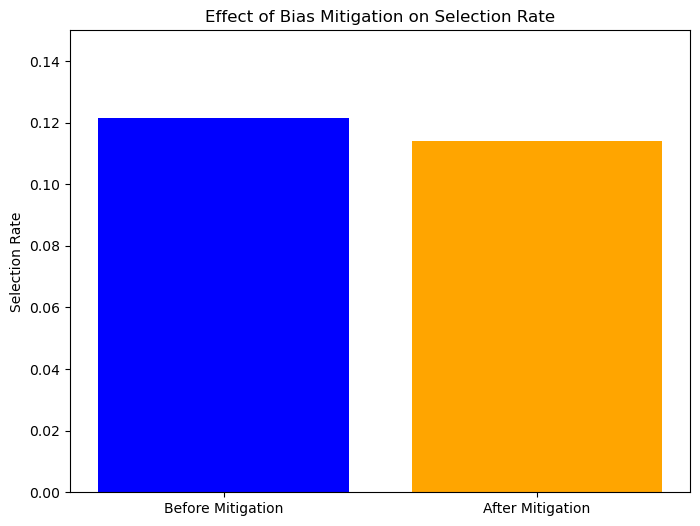

In [36]:
import matplotlib.pyplot as plt

# Define the selection rates before and after mitigation
selection_rate_before = 0.1215
selection_rate_after = 0.114167

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Before Mitigation', 'After Mitigation'], [selection_rate_before, selection_rate_after], color=['blue', 'orange'])
plt.ylim(0, 0.15)
plt.ylabel('Selection Rate')
plt.title('Effect of Bias Mitigation on Selection Rate')
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


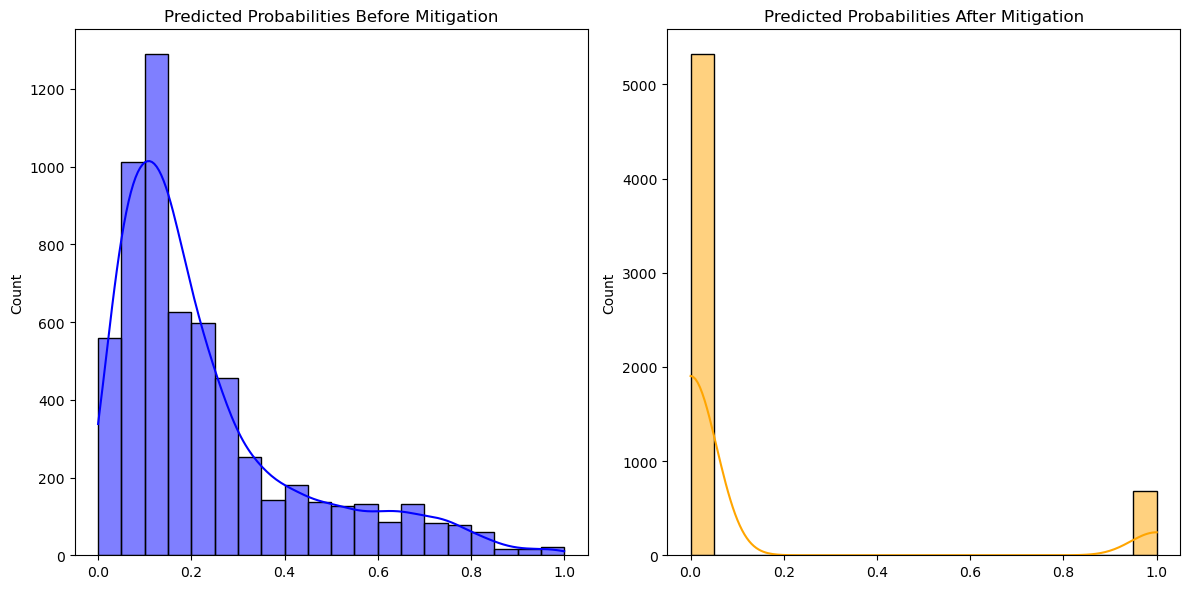

In [40]:
# Predict on test data before mitigation
y_pred_before = model.predict_proba(X_test)[:, 1]

# Create a histogram of predicted probabilities before and after mitigation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_pred_before, bins=20, kde=True, color='blue')
plt.title('Predicted Probabilities Before Mitigation')

# Repeat the process for y_pred_after
y_pred_after = sweep.predict(X_test)
y_pred_after = sweep.predict(X_test)
plt.subplot(1, 2, 2)
sns.histplot(y_pred_after, bins=20, kde=True, color='orange')
plt.title('Predicted Probabilities After Mitigation')

plt.tight_layout()
plt.show()


# Receiver Operating Characteristic (ROC) Curve

The ROC curve visualizes the performance of a binary classifier at various threshold settings. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values.

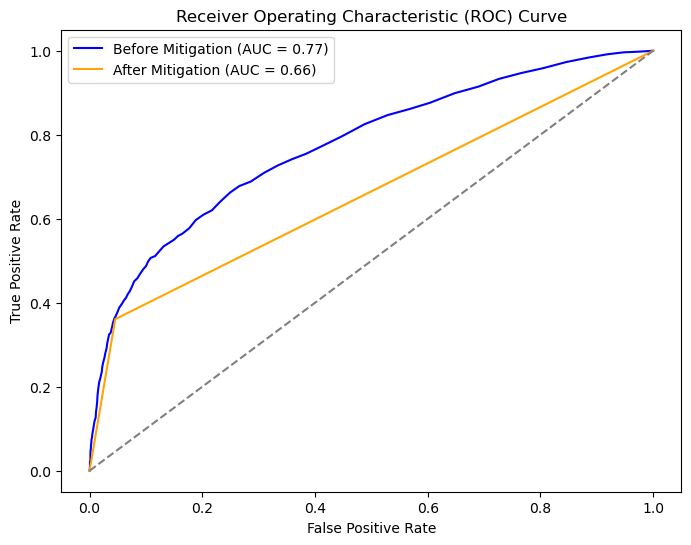

In [41]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC before and after mitigation
fpr_before, tpr_before, _ = roc_curve(y_test, y_pred_before)
roc_auc_before = auc(fpr_before, tpr_before)
fpr_after, tpr_after, _ = roc_curve(y_test, y_pred_after)
roc_auc_after = auc(fpr_after, tpr_after)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_before, tpr_before, color='blue', label=f'Before Mitigation (AUC = {roc_auc_before:.2f})')
plt.plot(fpr_after, tpr_after, color='orange', label=f'After Mitigation (AUC = {roc_auc_after:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Precision-Recall Curve

The precision-recall curve plots the precision (positive predictive value) against the recall (sensitivity) for different threshold settings of a binary classifier.

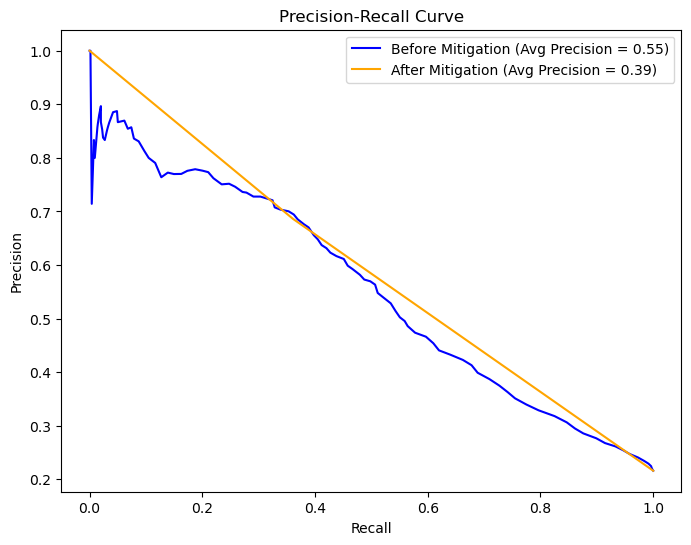

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve and average precision score before and after mitigation
precision_before, recall_before, _ = precision_recall_curve(y_test, y_pred_before)
average_precision_before = average_precision_score(y_test, y_pred_before)
precision_after, recall_after, _ = precision_recall_curve(y_test, y_pred_after)
average_precision_after = average_precision_score(y_test, y_pred_after)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_before, precision_before, color='blue', label=f'Before Mitigation (Avg Precision = {average_precision_before:.2f})')
plt.plot(recall_after, precision_after, color='orange', label=f'After Mitigation (Avg Precision = {average_precision_after:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Feature Importance Plot

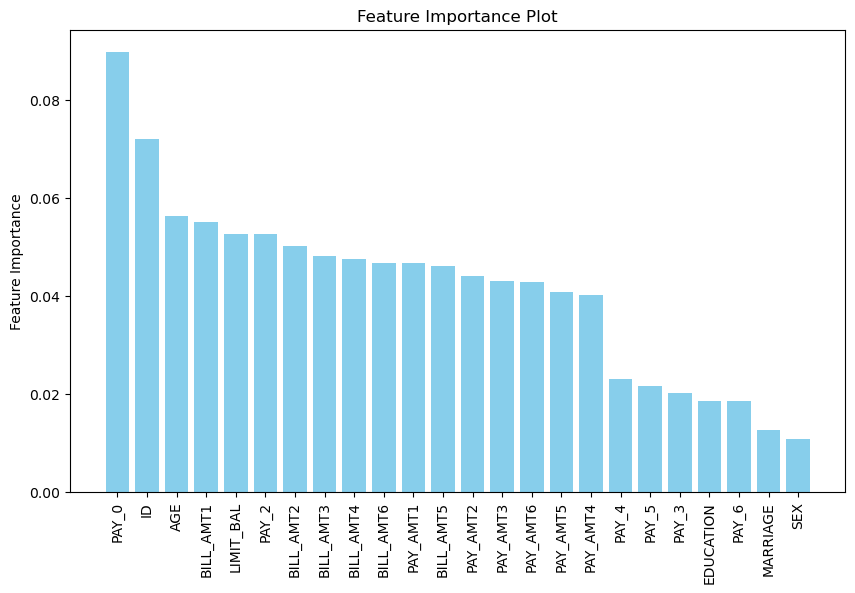

In [44]:
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()